In [517]:
import numpy as np
import seaborn as sns

In [518]:
import pandas as pd

In [519]:
import matplotlib.pyplot as plt

In [520]:
from sklearn import preprocessing

In [521]:
from sklearn.decomposition import PCA

In [522]:
from sklearn.preprocessing import StandardScaler

In [523]:
iris= pd.read_csv(r"C:\Users\stuar\Documents\College\Data Mining\Assignment\iris.csv")

In [524]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [525]:
lab = preprocessing.LabelEncoder()

In [526]:
iris.Species = lab.fit_transform(iris.Species) #Cnverting string labels to Numeric

In [527]:
iris = iris.drop("Id",axis=1)

In [528]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [529]:
X_n = iris.iloc[:, :-1].values

In [530]:
Y_n = iris.loc[:,'Species'].values

In [531]:
X= StandardScaler().fit_transform(X_n)

In [532]:
pca = PCA(n_components=1)

In [533]:
pcomponents= pca.fit(X).transform(X)

In [534]:
pDf = pd.DataFrame(data = pcomponents,columns = ['Principal Component 1'])

In [549]:
var=(pca.explained_variance_ratio_)
print("Explained Variance Ratio : ",var)

Explained Variance Ratio :  [0.72770452]


### 1st Principal Component vs. The Original Feature itself.

In [537]:
x_df=pd.DataFrame(X)
x_df.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x_nf=pd.DataFrame(X_n)
x_nf.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
y_df=pd.DataFrame(pcomponents)
y_df.columns=['PC1']

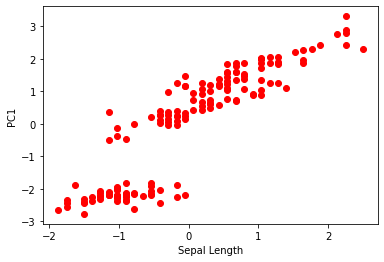

In [545]:

plt.xlabel("Sepal Length")
plt.ylabel("PC1")
plt.scatter(x_df['SepalLengthCm'],y_df['PC1'],color=['red'])

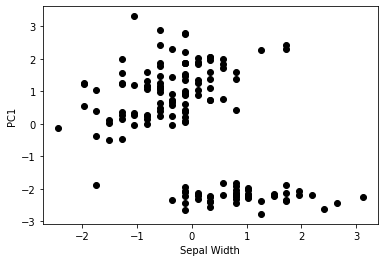

In [546]:
plt.xlabel("Sepal Width")
plt.ylabel("PC1")
plt.scatter(x_df['SepalWidthCm'],y_df['PC1'],color=['black'])

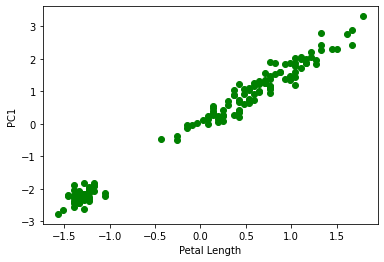

In [547]:
plt.xlabel("Petal Length")
plt.ylabel("PC1")
plt.scatter(x_df['PetalLengthCm'],y_df['PC1'],color=['green'])

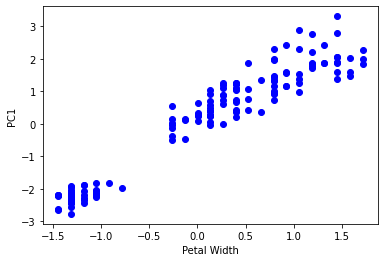

In [548]:
plt.xlabel("Petal Width")
plt.ylabel("PC1")
plt.scatter(x_df['PetalWidthCm'],y_df['PC1'],color=['blue'])

## Cosine Distance

In [511]:
cossim_sepallen=np.dot(x_nf['SepalLengthCm'],y_df['PC1'])/(np.linalg.norm(x_nf['SepalLengthCm'])* np.linalg.norm(y_df['PC1']))
print(f"Cosine Similarity between Sepal Length and PC1",cossim_sepallen)
print(f"Cosine Distance between Sepal Length and PC1",1-cossim_sepallen)

cossim_sepalwlen=np.dot(x_nf['SepalWidthCm'],y_df['PC1'])/(np.linalg.norm(x_nf['SepalWidthCm'])* np.linalg.norm(y_df['PC1']))
print(f"\nCosine Simlarity between Sepal Width and PC1",cossim_sepalwlen)
print(f"Cosine Distance between Sepal Width and PC1",1-cossim_sepalwlen)

cossim_petalllen=np.dot(x_nf['PetalLengthCm'],y_df['PC1'])/(np.linalg.norm(x_nf['PetalLengthCm'])* np.linalg.norm(y_df['PC1']))
print(f"\nCosine Similarity between Petal Length and PC1",cossim_petalllen)
print(f"Cosine Distance between Petal Length and PC1",1-cossim_petalllen)

cossim_petalwlen=np.dot(x_nf['PetalWidthCm'],y_df['PC1'])/(np.linalg.norm(x_nf['PetalWidthCm'])* np.linalg.norm(y_df['PC1']))
print(f"\nCosine Similarity between Petal Width and PC1",cossim_petalwlen)
print(f"Cosine Distance between Petal Width and PC1",1-cossim_petalwlen)



Cosine Similarity between Sepal Length and PC1 0.12463783944046346
Cosine Distance between Sepal Length and PC1 0.8753621605595365

Cosine Simlarity between Sepal Width and PC1 -0.06295149896206062
Cosine Distance between Sepal Width and PC1 1.0629514989620605

Cosine Similarity between Petal Length and PC1 0.4202488148606838
Cosine Distance between Petal Length and PC1 0.5797511851393162

Cosine Similarity between Petal Width and PC1 0.51702970991952
Cosine Distance between Petal Width and PC1 0.48297029008048


### Yes, here cosine similarity measures the similarity between Petal Length and Petal Width, and it's cosine value are nearly similar which means these 2 vector are roughly in same direction. Also graph plotted are similar in nature of both the feature i.e. of Petal Length and Petal Width, as when projected with first principal component.

# Correlation Coefficient of each feature with Principal Component 1

In [551]:
correl1=np.corrcoef(y_df['PC1'], x_df['SepalLengthCm'])
print("Correlation Coefficient Principal Component vs Sepal Length : ",correl1.item(1))
correl2=np.corrcoef(y_df['PC1'], x_df['SepalWidthCm'])
print("Correlation Coefficient Principal Component vs Sepal Width : ",correl2.item(1))
correl3=np.corrcoef(y_df['PC1'], x_df['PetalLengthCm'])
print("\nCorrelation Coefficient Principal Component vs Petal Length : ",correl3.item(1))
correl4=np.corrcoef(y_df['PC1'], x_df['PetalWidthCm'])
print("Correlation Coefficient Principal Component vs Petal Width : ",correl4.item(1))

Correlation Coefficient Principal Component vs Sepal Length :  0.8912244788933578
Correlation Coefficient Principal Component vs Sepal Width :  -0.4493129756580254

Correlation Coefficient Principal Component vs Petal Length :  0.9916844215984975
Correlation Coefficient Principal Component vs Petal Width :  0.9649957874713758


### Here, we can observe that correelation coefficient of Petal Length and Petal Width are very similar. So, yes, I agree that the results match with the visual inspection as represented above.